In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Load the diabetes dataset
data = datasets.load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [19]:
print (data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
dataframe= pd.DataFrame(data.data)
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
dataframe.columns = data.feature_names
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
dataframe['PRICE']= data.target
dataframe.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
from sklearn.linear_model import LinearRegression

X = dataframe.drop('PRICE',axis=1)
#create linear regression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lm.fit(X,dataframe.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print ("estimated intercepts coefficient:{} ".format(lm.intercept_))

estimated intercepts coefficient:36.49110328036135 


In [32]:
print ("number of coefficient: {}" .format(len(lm.coef_)))

number of coefficient: 13


In [34]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [35]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [39]:
#construct a data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X.columns, lm.coef_)),columns=['features','estimateCoefficients'])

,features,estimateCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


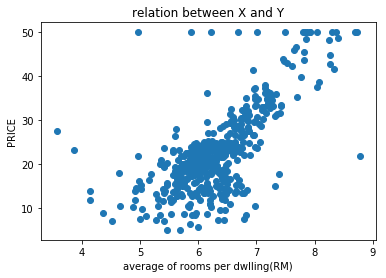

In [42]:
#PLOT correlation
plt.scatter(dataframe.RM,dataframe.PRICE)
plt.xlabel('average of rooms per dwlling(RM)')
plt.ylabel('PRICE')
plt.title("relation between X and Y")
plt.show()

In [43]:
#Prediction
#prediction of y and show 5 values
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'true value vs predicted value')

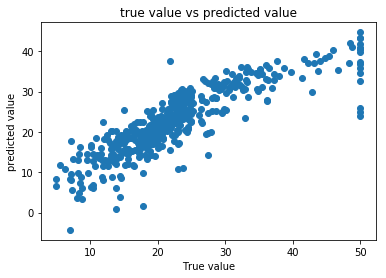

In [44]:
#plot the true value with predict value
plt.scatter(dataframe.PRICE,lm.predict(X) )
plt.xlabel('True value')
plt.ylabel('predicted value')
plt.title('true value vs predicted value')

In [45]:
#mean squared error
msefull =np.mean((dataframe.PRICE -lm.predict(X))** 2)
print ("mean squared error:{}" .format(msefull))

mean squared error:21.897779217687496


In [52]:
#split data
X_train, x_test, Y_train, y_test = train_test_split(X , dataframe.PRICE, test_size=0.3, random_state=0)
#show number of train data 
X_train.shape, Y_train.shape

((354, 13), (354,))

In [53]:
#show number of test data
x_test.shape, y_test.shape

((152, 13), (152,))

In [56]:
#build the model
lm = LinearRegression()
lm.fit(X_train,Y_train)
predic_train =lm.predict(X_train)
predic_test =lm.predict(x_test)

In [64]:
#MSE
mse_train = np.mean((Y_train-predic_train)** 2)
mse_test = np.mean((y_test-predic_test)**2)

In [66]:
print ("Fit a model X_train and calculate MSE with Y_train:", mse_train)
print ("Fit a model X_train and calculate MSE with X_test, Y_test:", mse_test)


Fit a model X_train and calculate MSE with Y_train: 19.965743810157857
Fit a model X_train and calculate MSE with X_test, Y_test: 27.183847647602366


In [72]:
#Variance
lm.score(x_test, y_test)

0.6735280865347352

In [74]:
x_test.shape, y_test.shape

((152, 13), (152,))

ValueError: x and y must be the same size

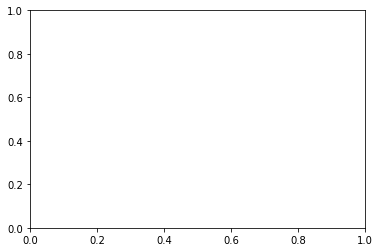

In [75]:
#PLOT RESULTS
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, predic_test, color='blue',linewidth=3)

Text(0,0.5,'residuals')

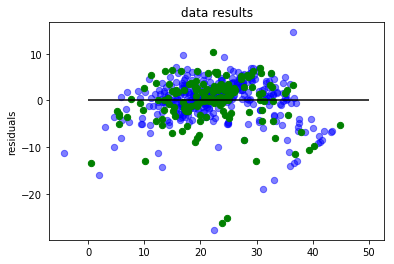

In [67]:
#PLOT RESULTS
plt.scatter(predic_train, predic_train - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(predic_test, predic_test - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("data results")
plt.ylabel("residuals")

AttributeError: 'numpy.ndarray' object has no attribute 'head'